In [1]:
from __future__ import annotations

import os
from dotenv import load_dotenv
from stonks.data_preprocessing import Client

load_dotenv()
API_KEY = os.getenv("POLYGON_API_KEY")
client = Client(API_KEY)

Below, we begin to pull in data for a specified stock ticker. We pull in data from Polygon.io using an API_KEY. 
* The API_KEY is stored in a *.env* file that was ignored when we push everything to Github, just to ensure best practices.

The code in the following cell does some cleaning. It filters out contracts that do not have any greeks. Additionally, we are only pulling in options contracts for a given time frame according to the default values we have established. Our goal is to return a dataframe of contracts that can be analyzed.

In [ ]:
ticker = "AAL"
contracts = client.get_option_contracts(ticker)
historial_stock_data = client.get_price_history(ticker)

In [ ]:
historial_stock_data.head()

,volume,vw,open,close,high,low,timestamp,n
0,19455166.0,14.6810,14.66,14.73,14.825,14.57,2023-08-28 04:00:00,60425
1,22186448.0,14.9023,14.74,14.90,14.990,14.69,2023-08-29 04:00:00,64739
2,19981093.0,14.8457,14.93,14.77,14.950,14.76,2023-08-30 04:00:00,55934
3,13994479.0,14.7667,14.89,14.73,14.915,14.68,2023-08-31 04:00:00,47985
4,14755517.0,14.6763,14.80,14.68,14.840,14.59,2023-09-01 04:00:00,51594


Lets further look at the actual stock movement of a given ticker symbol

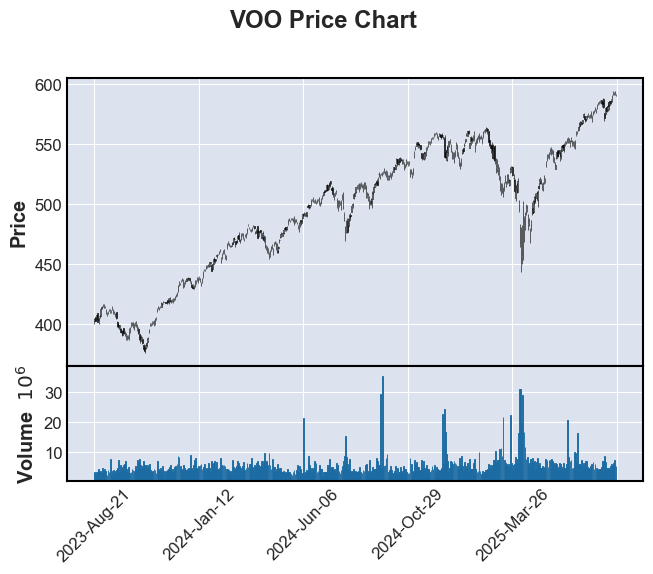

In [22]:
url = f"https://api.polygon.io/v2/aggs/ticker/{ticker}/range/1/day/{previous_date}/{today_date}"

params = {
    "adjusted": "true",
    "sort": "asc",
    "limit": 600,
    "apiKey": API_KEY
}

response = requests.get(url, params=params)
data = response.json()

if "results" not in data:
    print("Error or no results:", data)
else:
    df = pd.DataFrame(data["results"])
    df["t"] = pd.to_datetime(df["t"], unit="ms")
    df.set_index("t", inplace=True)

    df = df.rename(columns={
        "o": "Open",
        "h": "High",
        "l": "Low",
        "c": "Close",
        "v": "Volume"
    })

    df = df[["Open", "High", "Low", "Close", "Volume"]]

    mpf.plot(df, type="candle", volume=True, title=f"{ticker} Price Chart")


In [23]:
data = pd.DataFrame(data)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
data['results']

0        {'v': 3292434.0, 'vw': 402.3813, 'o': 402.14, 'c': 403.74, 'h': 404.39, 'l': 399.99, 't': 1692590400000, 'n': 96242}
1           {'v': 2648051.0, 'vw': 403.32, 'o': 405.35, 'c': 402.61, 'h': 405.4, 'l': 402.06, 't': 1692676800000, 'n': 75926}
2        {'v': 3249964.0, 'vw': 406.0668, 'o': 403.56, 'c': 406.95, 'h': 407.67, 'l': 403.47, 't': 1692763200000, 'n': 68994}
3         {'v': 3458791.0, 'vw': 404.5199, 'o': 408.6, 'c': 401.54, 'h': 409.079, 'l': 401.4, 't': 1692849600000, 'n': 81647}
4          {'v': 4417835.0, 'vw': 402.9004, 'o': 403.08, 'c': 404.2, 'h': 405.8, 'l': 399.71, 't': 1692936000000, 'n': 92445}
                                                                ...                                                          
495    {'v': 5874245.0, 'vw': 588.6198, 'o': 586.75, 'c': 590.78, 'h': 590.96, 'l': 585.435, 't': 1754971200000, 'n': 183741}
496     {'v': 5392973.0, 'vw': 592.2992, 'o': 592.86, 'c': 592.84, 'h': 594.03, 'l': 590.81, 't': 1755057600000, 'n': 

In [24]:
results = pd.json_normalize(data["results"])
flattened_results = pd.concat([data.reset_index(drop=True), results], axis=1)
historical_data = flattened_results[['ticker','vw', 'o', 'h', 'l', 'c', 'v','t','n']]
historical_data['datetime'] = pd.to_datetime(historical_data['t'], unit='ms')
historical_data = historical_data.set_index('datetime')
historical_data.head()

/var/folders/kw/2qkht0_n5ksdwhs1fsbt95pw0000gn/T/ipykernel_5084/2129047425.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historical_data['datetime'] = pd.to_datetime(historical_data['t'], unit='ms')


,ticker,vw,o,h,l,c,v,t,n
datetime,,,,,,,,,
2023-08-21 04:00:00,VOO,402.3813,402.14,404.390,399.99,403.74,3292434.0,1692590400000,96242
2023-08-22 04:00:00,VOO,403.3200,405.35,405.400,402.06,402.61,2648051.0,1692676800000,75926
2023-08-23 04:00:00,VOO,406.0668,403.56,407.670,403.47,406.95,3249964.0,1692763200000,68994
2023-08-24 04:00:00,VOO,404.5199,408.60,409.079,401.40,401.54,3458791.0,1692849600000,81647
2023-08-25 04:00:00,VOO,402.9004,403.08,405.800,399.71,404.20,4417835.0,1692936000000,92445


In [32]:
from __future__ import annotations

def compute_indicators(
    df: pd.DataFrame,
    price_col: str = "vw",
    window_short: int = 10,
    window_long: int = 50,
    sharpe_windows: list[int] = [20, 60, 120]
) -> pd.DataFrame:
    df = df.copy()
    price = df[price_col]

    # Returns & moving averages
    df["ret_1"] = price.pct_change()
    df["sma_short"] = price.rolling(window_short, min_periods=1).mean()
    df["sma_long"] = price.rolling(window_long, min_periods=1).mean()
    df["ema_short"] = price.ewm(span=window_short, adjust=False).mean()
    df["ema_long"] = price.ewm(span=window_long, adjust=False).mean()

    # Momentum
    df["momentum"] = (df["sma_short"] - df["sma_long"]) / df["sma_long"]

    # Volatility (annualized)
    df["vol_20"] = df["ret_1"].rolling(20, min_periods=1).std() * np.sqrt(252)

    # RSI (14-day)
    delta = price.diff()
    up = delta.clip(lower=0)
    down = -delta.clip(upper=0)
    roll_up = up.rolling(14, min_periods=1).mean()
    roll_down = down.rolling(14, min_periods=1).mean()
    rs = roll_up / (roll_down + 1e-12)
    df["rsi"] = 100 - (100 / (1 + rs))

    # MACD
    ema_12 = price.ewm(span=12, adjust=False).mean()
    ema_26 = price.ewm(span=26, adjust=False).mean()
    df["macd"] = ema_12 - ema_26
    df["macd_signal"] = df["macd"].ewm(span=9, adjust=False).mean()

    # Z-score (20-day)
    rolling_mean = price.rolling(20, min_periods=1).mean()
    rolling_std = price.rolling(20, min_periods=1).std(ddof=0)
    df["zscore_20"] = (price - rolling_mean) / (rolling_std + 1e-12)

    # Skewness & kurtosis
    df["skew_20"] = price.rolling(20, min_periods=1).apply(lambda x: pd.Series(x).skew(), raw=False)
    df["kurt_20"] = price.rolling(20, min_periods=1).apply(lambda x: pd.Series(x).kurt(), raw=False)

    # Bollinger Bands
    bb_mid = price.rolling(20, min_periods=1).mean()
    bb_std = price.rolling(20, min_periods=1).std(ddof=0)
    df["bb_mid"] = bb_mid
    df["bb_upper"] = bb_mid + 2 * bb_std
    df["bb_lower"] = bb_mid - 2 * bb_std

    # Rolling Sharpe Ratios
    for w in sharpe_windows:
        roll_ret = df["ret_1"].rolling(w, min_periods=1)
        mean_ret = roll_ret.mean()
        std_ret = roll_ret.std(ddof=0)
        df[f"sharpe_{w}"] = (mean_ret / (std_ret + 1e-12)) * np.sqrt(252)

    return df.dropna()


def plot_indicators(indicators_df: pd.DataFrame, sharpe_windows=[20, 60, 120]) -> None:
    fig, axs = plt.subplots(5, 1, figsize=(14, 16), sharex=True)

    # Price & Bands
    axs[0].plot(indicators_df.index, indicators_df["vw"], label="VWAP", color="black")
    for col, color in [("sma_short", "blue"), ("sma_long", "red"), 
                       ("ema_short", "cyan"), ("ema_long", "magenta"),
                       ("bb_upper", "gray"), ("bb_mid", "orange"), ("bb_lower", "gray")]:
        axs[0].plot(indicators_df.index, indicators_df[col], label=col.replace("_", " ").title(), color=color)
    axs[0].set_title("Price, Moving Averages & Bollinger Bands")
    axs[0].legend()
    axs[0].grid(True)

    # Momentum & RSI
    axs[1].plot(indicators_df.index, indicators_df["momentum"], label="Momentum", color="green")
    ax2 = axs[1].twinx()
    ax2.plot(indicators_df.index, indicators_df["rsi"], label="RSI (14)", color="blue")
    ax2.set_ylim(0, 110)
    axs[1].set_title("Momentum & RSI")
    lines, labels = axs[1].get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    axs[1].legend(lines + lines2, labels + labels2, loc="center left", bbox_to_anchor=(1.1, 0.5))
    axs[1].grid(True)

    # MACD
    axs[2].plot(indicators_df.index, indicators_df["macd"], label="MACD", color="purple")
    axs[2].plot(indicators_df.index, indicators_df["macd_signal"], label="Signal", color="orange")
    axs[2].axhline(0, color="gray", linestyle="--")
    axs[2].set_title("MACD")
    axs[2].legend()
    axs[2].grid(True)

    # Volatility
    axs[3].plot(indicators_df.index, indicators_df["vol_20"], label="Volatility (20d)", color="brown")
    axs[3].set_title("Volatility")
    axs[3].legend()
    axs[3].grid(True)

    # Sharpe Ratios
    for w in sharpe_windows:
        axs[4].plot(indicators_df.index, indicators_df[f"sharpe_{w}"], label=f"Sharpe ({w}d)")
    axs[4].axhline(0, color="gray", linestyle="--")
    axs[4].set_title("Rolling Sharpe Ratios")
    axs[4].legend()
    axs[4].grid(True)

    plt.xlabel("Date")
    plt.tight_layout()
    plt.show()



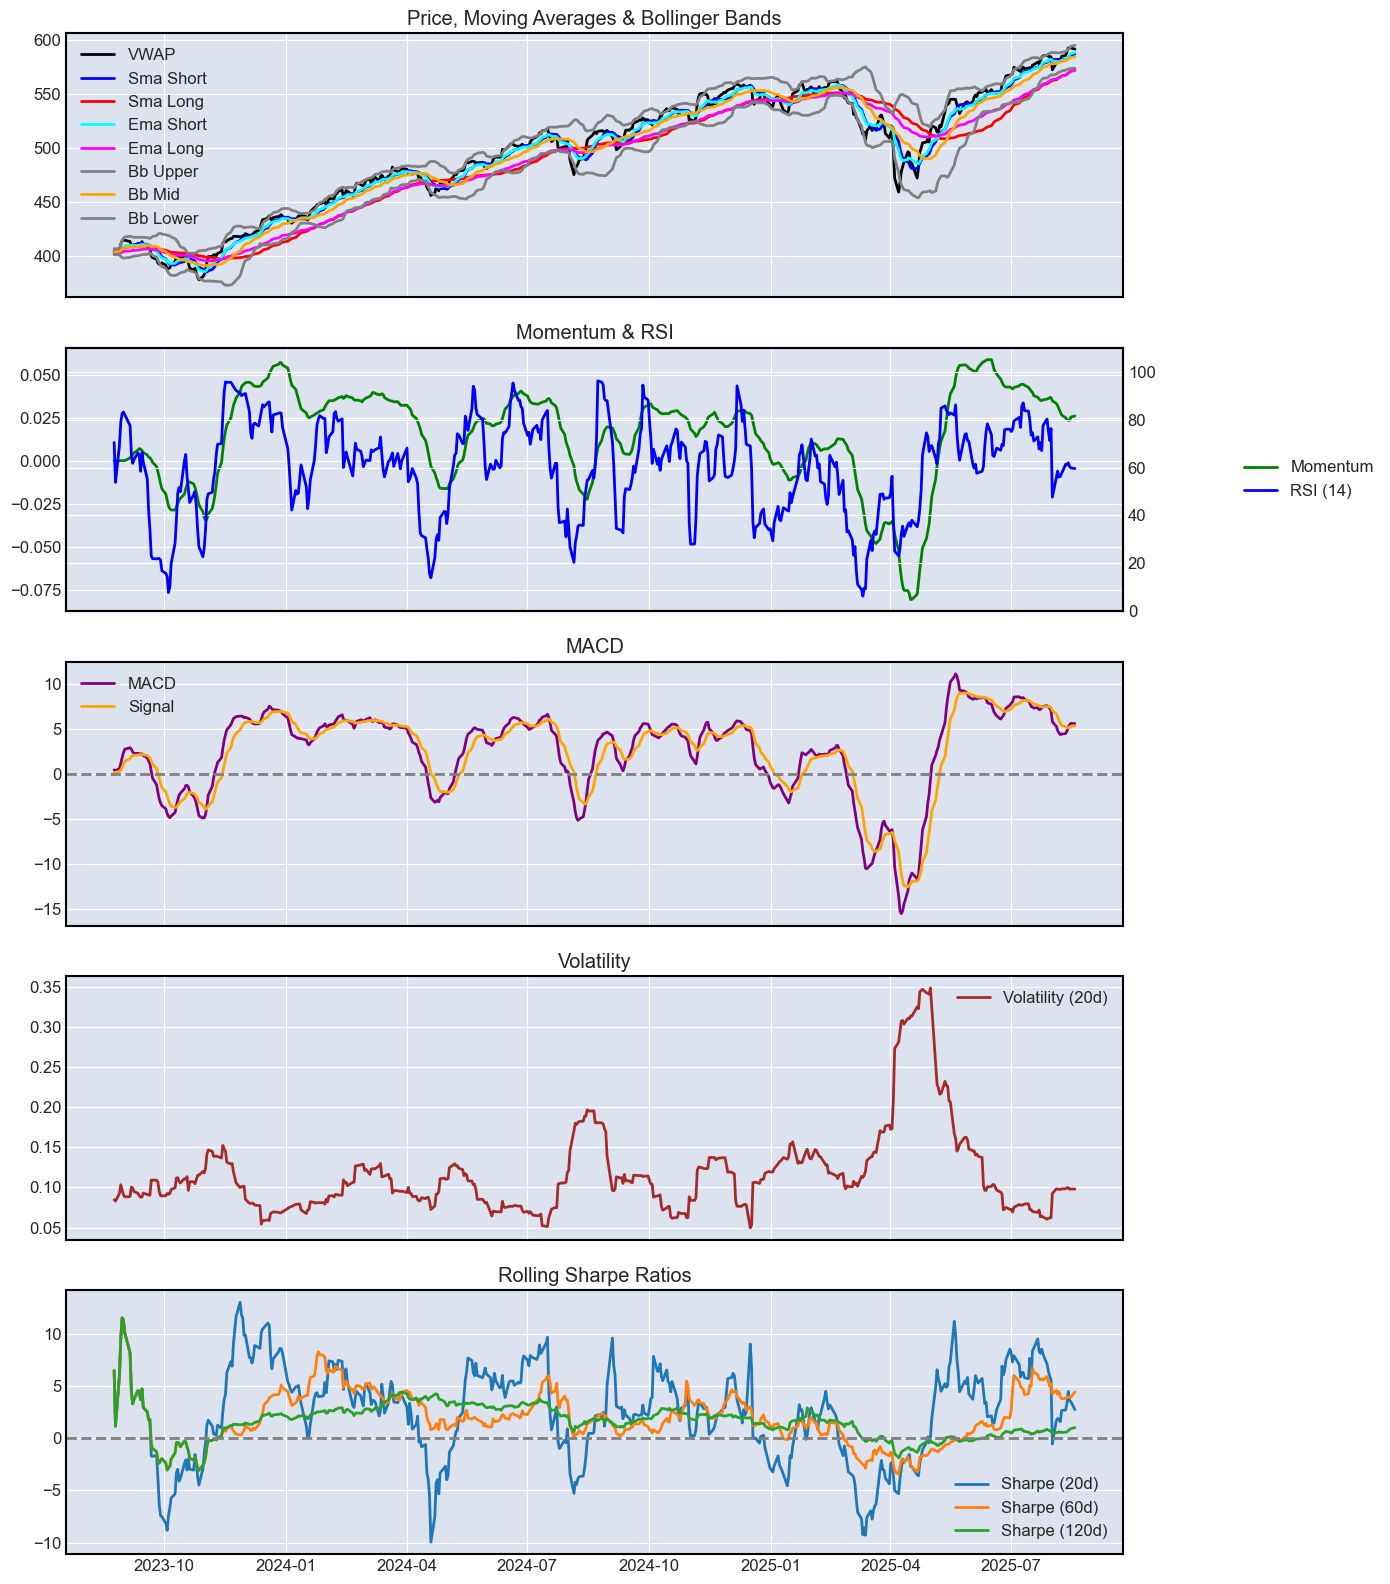

In [33]:
indicators = compute_indicators(historical_data, price_col='vw')
plot_indicators(indicators)

In [1]:
import math
import dataclasses
from dataclasses import dataclass
from typing import Literal, Iterable, Optional, Tuple, Dict, Any


import numpy as np
import pandas as pd


# Optional imports (guarded)
import numpy as np
import pandas as pd


# Optional imports (guarded)
try:
    import QuantLib as ql
except Exception: # pragma: no cover
    ql = None


try:
    import riskfolio as rp
except Exception: # pragma: no cover
    rp = None

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
@dataclass(frozen=True)
class OptionRow:
    ticker: str
    underlying: str
    contract_type: Literal["call", "put"]
    exchange: str
    expiry: pd.Timestamp
    strike: float
    shares_per_contract: int = 100
    delta: Optional[float] = None
    gamma: Optional[float] = None
    theta: Optional[float] = None
    vega: Optional[float] = None
    iv: Optional[float] = None
    open_interest: Optional[int] = None

@dataclass
class MarketSnapshot:
    spot: float
    rate: float # continuously compounded risk-free
    div: float # continuous dividend / borrow cost
    vol: float # flat vol if no surface
    asof: pd.Timestamp

In [3]:
"""
Quant Options Research Suite
-------------------------------------------------
A cohesive, modular toolkit for institutional-grade options research.

Features
- Robust pricing via QuantLib (American/European, Binomial/BAW, MC, Heston).
- Implied vol and surface bootstrapping utilities.
- Scenario engine (rate/div/vol/spot shocks) with risk measures.
- Vectorized analytics (NumPy) for fast approximations.
- Portfolio construction using riskfolio-lib (max Sharpe / risk parity / CVaR).
- Feature engineering for options + underlyings.
- ML pipeline (purged walk-forward CV, leakage-safe) to forecast IV/delta/price changes.

Dependencies
    pip install QuantLib-Python riskfolio-lib scikit-learn xgboost pandas numpy matplotlib

Notes
- This is a research scaffold. Wire your market data and execution layers as needed.
- All times are year fractions; ensure consistent day count when integrating with real feeds.
"""
from __future__ import annotations

import math
import dataclasses
from dataclasses import dataclass
from typing import Literal, Iterable, Optional, Tuple, Dict, Any

import numpy as np
import pandas as pd

# Optional imports (guarded)
try:
    import QuantLib as ql
except Exception:  # pragma: no cover
    ql = None

try:
    import riskfolio as rp
except Exception:  # pragma: no cover
    rp = None

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit

# =========================================================
# 1) DATA STRUCTURES
# =========================================================
@dataclass(frozen=True)
class OptionRow:
    ticker: str
    underlying: str
    contract_type: Literal["call", "put"]
    exchange: str
    expiry: pd.Timestamp
    strike: float
    shares_per_contract: int = 100
    delta: Optional[float] = None
    gamma: Optional[float] = None
    theta: Optional[float] = None
    vega: Optional[float] = None
    iv: Optional[float] = None
    open_interest: Optional[int] = None


@dataclass
class MarketSnapshot:
    spot: float
    rate: float  # continuously compounded risk-free
    div: float   # continuous dividend / borrow cost
    vol: float   # flat vol if no surface
    asof: pd.Timestamp


# =========================================================
# 2) QUANTLIB PRICER
# =========================================================
class QLPricer:
    """Thin wrapper around QuantLib for robust vanilla pricing & Greeks."""

    def __init__(self, snapshot: MarketSnapshot):
        if ql is None:
            raise ImportError("QuantLib-Python not installed. pip install QuantLib-Python")
        self.snapshot = snapshot
        self.calendar = ql.NullCalendar()
        self.dc = ql.Actual365Fixed()
        self._build_handles()

    def _build_handles(self):
        s = ql.SimpleQuote(self.snapshot.spot)
        r = ql.FlatForward(0, self.calendar, self.snapshot.rate, self.dc)
        q = ql.FlatForward(0, self.calendar, self.snapshot.div, self.dc)
        v = ql.BlackConstantVol(0, self.calendar, self.snapshot.vol, self.dc)
        self.spot_h = ql.QuoteHandle(s)
        self.r_h = ql.YieldTermStructureHandle(r)
        self.q_h = ql.YieldTermStructureHandle(q)
        self.vol_h = ql.BlackVolTermStructureHandle(v)
        self.process = ql.BlackScholesMertonProcess(self.spot_h, self.q_h, self.r_h, self.vol_h)

    def set_spot(self, spot: float):
        self.spot_h.setValue(spot)

    def set_flat_vol(self, vol: float):
        self.vol_h.setBlackVol(self.snapshot.asof, vol)

    # ---- instruments ----
    @staticmethod
    def _ql_type(opt_type: Literal["call", "put"]):
        return ql.Option.Call if opt_type == "call" else ql.Option.Put

    def _to_exercise(self, expiry: pd.Timestamp, american: bool):
        ql.Settings.instance().evaluationDate = ql.Date(self.snapshot.asof.day,
                                                        self.snapshot.asof.month,
                                                        self.snapshot.asof.year)
        maturity = ql.Date(expiry.day, expiry.month, expiry.year)
        if american:
            return ql.AmericanExercise(ql.Settings.instance().evaluationDate, maturity)
        return ql.EuropeanExercise(maturity)

    def price_vanilla(
        self,
        k: float,
        expiry: pd.Timestamp,
        opt_type: Literal["call", "put"],
        model: Literal["BAW", "BinomialCRR", "BinomialJR", "AnalyticBSM"] = "BAW",
        steps: int = 201,
        american: bool = True,
    ) -> Dict[str, float]:
        payoff = ql.PlainVanillaPayoff(self._ql_type(opt_type), k)
        exercise = self._to_exercise(expiry, american)
        option = ql.VanillaOption(payoff, exercise)

        if american:
            if model == "BAW":
                engine = ql.BaroneAdesiWhaleyApproximationEngine(process)
            else:  # binomial engines
                tree = {
                    "BinomialCRR": ql.BinomialVanillaEngine(self.process, "crr", steps),
                    "BinomialJR": ql.BinomialVanillaEngine(self.process, "jr", steps),
                }[model]
                engine = tree
        else:
            engine = ql.AnalyticEuropeanEngine(self.process) if model == "AnalyticBSM" \
                     else ql.BinomialVanillaEngine(self.process, "crr", steps)
        option.setPricingEngine(engine)

        # Output
        npv = option.NPV()
        greeks = {
            "delta": option.delta(),
            "gamma": option.gamma(),
            "theta": option.theta(),
            "vega": option.vega(),
            "rho": option.rho(),
        }
        greeks["price"] = npv
        return greeks

    def implied_vol(
        self,
        price: float,
        k: float,
        expiry: pd.Timestamp,
        opt_type: Literal["call", "put"],
        american: bool = False,
        guess: float = 0.2,
        bounds: Tuple[float, float] = (1e-4, 5.0),
    ) -> float:
        # QuantLib's impliedVolatility works for European; for American we switch to BAW approx.
        payoff = ql.PlainVanillaPayoff(self._ql_type(opt_type), k)
        exercise = self._to_exercise(expiry, american)
        option = ql.VanillaOption(payoff, exercise)
        engine = ql.AnalyticEuropeanEngine(self.process) if not american else ql.BaroneAdesiWhaleyEngine(self.process)
        option.setPricingEngine(engine)
        return option.impliedVolatility(price, self.process, guess, 1e-8, bounds[0], bounds[1])


# =========================================================
# 3) FAST BINOMIAL (NUMPY) — EDUCATIONAL, VECTORIZED
# =========================================================

def american_crr_numpy(
    s: float, k: float, r: float, q: float, sigma: float, t: float,
    opt_type: Literal["call", "put"], steps: int = 200
) -> float:
    """Vectorized CRR with early exercise. Useful as a fallback / validation."""
    if sigma <= 0 or t <= 0 or s <= 0 or k <= 0:
        return max(0.0, (s - k) if opt_type == "call" else (k - s))

    dt = t / steps
    u = math.exp(sigma * math.sqrt(dt))
    d = 1 / u
    disc = math.exp(-r * dt)
    p = (math.exp((r - q) * dt) - d) / (u - d)

    # terminal prices & payoffs
    j = np.arange(steps + 1)
    prices = s * (u ** j) * (d ** (steps - j))
    values = np.maximum(prices - k, 0.0) if opt_type == "call" else np.maximum(k - prices, 0.0)

    for i in range(steps - 1, -1, -1):
        values = disc * (p * values[1:i+2] + (1 - p) * values[:i+1])
        prices = prices[:i+1] / u  # roll back prices one step
        exer = np.maximum(prices - k, 0.0) if opt_type == "call" else np.maximum(k - prices, 0.0)
        values = np.maximum(values, exer)
    return float(values[0])


# =========================================================
# 4) SCENARIO ENGINE & RISK
# =========================================================
@dataclass
class Shock:
    dS: float = 0.0     # spot shock in pct (e.g., -0.05 for -5%)
    dV: float = 0.0     # absolute vol shock (e.g., +0.05)
    dR: float = 0.0     # rate shock (abs)
    dQ: float = 0.0     # dividend/borrow shock (abs)


def scenario_price(pricer: QLPricer, row: OptionRow, shock: Shock, model: str = "BAW") -> Dict[str, float]:
    """One-instrument reprice under shocks."""
    orig_spot = pricer.spot_h.value()
    pricer.set_spot(orig_spot * (1 + shock.dS))
    # Adjust curves via flat bumps
    bumped_r = pricer.snapshot.rate + shock.dR
    bumped_q = pricer.snapshot.div + shock.dQ
    bumped_v = max(1e-4, pricer.snapshot.vol + shock.dV)

    # Rebuild handles for bumps
    pricer.snapshot = MarketSnapshot(spot=pricer.spot_h.value(), rate=bumped_r, div=bumped_q, vol=bumped_v, asof=pricer.snapshot.asof)
    pricer._build_handles()

    out = pricer.price_vanilla(k=row.strike, expiry=row.expiry, opt_type=row.contract_type, model=model, american=True)

    # restore
    pricer.snapshot = MarketSnapshot(spot=orig_spot, rate=pricer.snapshot.rate - shock.dR, div=pricer.snapshot.div - shock.dQ, vol=pricer.snapshot.vol - shock.dV, asof=pricer.snapshot.asof)
    pricer.set_spot(orig_spot)
    pricer._build_handles()
    return out


# =========================================================
# 5) PORTFOLIO USING RISKFOLIO-LIB
# =========================================================
class OptionsPortfolio:
    """Treat options as assets using synthetic return series (mark-to-market PnL)."""
    def __init__(self, price_history: pd.DataFrame):
        """price_history: DataFrame[date x ticker] of option prices (or PnL)."""
        self.prices = price_history.sort_index()
        self.returns = self.prices.pct_change().dropna(how="all")
        if rp is None:
            raise ImportError("riskfolio-lib not installed. pip install riskfolio-lib")

    def optimize(self, rf: float = 0.0, objective: Literal["Sharpe", "MinRisk", "RP"] = "Sharpe") -> pd.Series:
        port = rp.Portfolio(returns=self.returns)
        port.assets_stats(method_mu="hist", method_cov="ledoit")
        if objective == "Sharpe":
            w = port.optimization(model="Classic", rm="MV", obj="Sharpe", rf=rf)
        elif objective == "MinRisk":
            w = port.optimization(model="Classic", rm="CVaR", obj="MinRisk", rf=rf)
        else:  # Risk Parity
            w = port.optimization(model="Classic", rm="MV", obj="RP", rf=rf)
        return w.iloc[:, 0]


# =========================================================
# 6) FEATURE ENGINEERING FOR ML
# =========================================================
class OptionFeatureBuilder(BaseEstimator, TransformerMixin):
    """Build leakage-safe features from option & underlying time series.

    Expects a DataFrame with columns:
    ['spot','rate','div','iv','price','strike','tau','moneyness','type','rv_20','rv_60', ...]
    You control how to assemble this table from your data vendor.
    """
    def __init__(self):
        pass

    def fit(self, X: pd.DataFrame, y=None):
        return self

    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        df = X.copy()
        # Basic transforms
        df["log_moneyness"] = np.log((df["spot"] + 1e-12) / df["strike"])  # ln(S/K)
        df["tau_sqrt"] = np.sqrt(np.clip(df["tau"], 1e-6, None))
        df["is_call"] = (df["type"] == "call").astype(int)
        df["skew_proxy"] = df.groupby(["date"])['iv'].transform(lambda s: s.rank(pct=True))  # cross-section rank
        # realized vol features (assume rv_20/rv_60 provided)
        for w in (5, 20, 60):
            if f"rv_{w}" not in df.columns and "ret" in df.columns:
                df[f"rv_{w}"] = df.groupby('underlying')['ret'].transform(lambda s: s.rolling(w).std() * np.sqrt(252))
        # lag features
        for lag in (1, 5):
            if "iv" in df.columns:
                df[f"iv_lag{lag}"] = df.groupby('ticker')["iv"].shift(lag)
        df = df.dropna()
        return df


# =========================================================
# 7) ML PIPELINE (FORECAST IV OR PRICE DELTA)
# =========================================================
class PurgedWalkForwardCV:
    """Simplified purged CV to avoid look-ahead bias.
    Splits by time; each fold trains on past, tests on next block, with a small gap.
    """
    def __init__(self, n_splits: int = 5, gap: int = 5):
        self.n_splits = n_splits
        self.gap = gap

    def split(self, X: pd.DataFrame, dates: pd.Series):
        # dates must be aligned with X index
        unique_dates = pd.Series(dates).sort_values().unique()
        folds = np.array_split(unique_dates, self.n_splits)
        for i in range(len(folds) - 1):
            train_end = folds[i][-1]
            test_block = folds[i + 1]
            # purge gap
            mask_train = dates <= train_end
            mask_gap = (dates > train_end) & (dates <= train_end + pd.Timedelta(days=self.gap))
            mask_train = mask_train & (~mask_gap)
            mask_test = dates.isin(test_block)
            yield np.where(mask_train)[0], np.where(mask_test)[0]


def train_iv_model(data: pd.DataFrame, target: Literal["d_iv", "d_price"] = "d_iv") -> Tuple[Pipeline, Dict[str, Any]]:
    """Train a leakage-safe model to forecast next-day IV change or option price change.

    Expected columns: ['date','ticker','underlying','spot','rate','div','iv','price','strike','tau','type', ...]
    We'll create y as next-day change.
    """
    df = data.copy().sort_values(['ticker','date'])
    # Targets
    if target == "d_iv":
        df['y'] = df.groupby('ticker')['iv'].shift(-1) - df['iv']
    else:
        df['y'] = df.groupby('ticker')['price'].shift(-1) - df['price']

    # Features
    fe = OptionFeatureBuilder()
    X = fe.fit_transform(df)
    y = X.join(df['y']).dropna(subset=['y'])['y']

    # columns to use (drop identifiers)
    feature_cols = [c for c in X.columns if c not in {'date','ticker','underlying'}]

    model = Pipeline([
        ("scale", StandardScaler(with_mean=False)),
        ("rf", RandomForestRegressor(n_estimators=400, max_depth=8, n_jobs=-1, random_state=42)),
    ])

    # Purged CV
    cv = PurgedWalkForwardCV(n_splits=5, gap=3)
    dates = pd.to_datetime(X['date'])

    oof, preds = [], np.zeros(len(X))
    for tr, te in cv.split(X, dates):
        model.fit(X.iloc[tr][feature_cols], y.iloc[tr])
        p = model.predict(X.iloc[te][feature_cols])
        preds[te] = p
        oof.append(mean_absolute_error(y.iloc[te], p))

    summary = {"MAE_cv": float(np.mean(oof)), "fold_MAE": [float(v) for v in oof]}

    # Final refit on all
    model.fit(X[feature_cols], y)
    return model, summary


# =========================================================
# 8) QUICK DEMOS (USAGE SKETCHES)
# =========================================================
if __name__ == "__main__":
    # ---- Pricing sanity check ----
    asof = pd.Timestamp.today().normalize()
    snap = MarketSnapshot(spot=100.0, rate=0.02, div=0.01, vol=0.25, asof=asof)
    if ql is not None:
        pricer = QLPricer(snap)
        res = pricer.price_vanilla(k=100, expiry=asof + pd.Timedelta(days=180), opt_type="call", american=True)
        print("QL price & greeks:", res)

    # ---- Fast CRR ----
    p = american_crr_numpy(100, 100, 0.02, 0.01, 0.25, 0.5, "call")
    print("CRR numpy price:", p)

    # ---- ML demo (toy) ----
    # Build a tiny synthetic dataset just to illustrate API
    dates = pd.date_range(asof - pd.Timedelta(days=120), periods=100, freq='B')
    toy = pd.DataFrame({
        'date': np.repeat(dates, 3),
        'ticker': np.tile(["OPT1","OPT2","OPT3"], len(dates)),
        'underlying': 'XYZ',
        'spot': 100 + np.random.randn(len(dates)*3).cumsum()*0.1,
        'rate': 0.02,
        'div': 0.01,
        'iv': 0.25 + 0.02*np.random.randn(len(dates)*3),
        'price': 3 + np.random.randn(len(dates)*3)*0.1,
        'strike': 100,
        'tau': 30/365,
        'type': np.random.choice(['call','put'], len(dates)*3),
        'ret': np.random.randn(len(dates)*3)/100,
    })

    model, info = train_iv_model(toy, target="d_iv")
    print("ML CV summary:", info)


NameError: name 'process' is not defined

In [ ]:
def contracts_to_frame(contracts: Iterable[dict]) -> pd.DataFrame:
    rows: list[OptionRow] = []
    for c in contracts:
        g = c.get("greeks", {})
        details = g.get("details", {})
        greeks = g.get("greeks", {})
        rows.append(
            OptionRow(
                ticker=c.get("ticker"),
                underlying=c.get("underlying_ticker"),
                contract_type=c.get("contract_type"),
                exchange=c.get("primary_exchange", ""),
                expiry=pd.to_datetime(c.get("expiration_date")),
                strike=float(c.get("strike_price")),
                shares_per_contract=int(c.get("shares_per_contract", 100)),
                delta=float(greeks.get("delta", np.nan)),
                gamma=float(greeks.get("gamma", np.nan)),
                theta=float(greeks.get("theta", np.nan)),
                vega=float(greeks.get("vega", np.nan)),
                iv=float(g.get("implied_volatility", np.nan)),
                open_interest=int(g.get("open_interest", 0)),
            )
        )
    df = pd.DataFrame([r.__dict__ for r in rows])
    now = pd.Timestamp.utcnow().tz_localize(None)
    df["expiry"] = pd.to_datetime(df["expiry"]).dt.tz_localize(None)
    df["days_to_expiry"] = (df["expiry"] - now).dt.days.clip(lower=0)
    df["days_to_expiry"] = (df["expiry"] - now).dt.days.clip(lower=0)
    return df

def assess_options(
    contracts: Iterable[dict],
    indicators: pd.DataFrame,
    *,
    risk_free: float = 0.04,
    dividend_yield: float = 0.015,
    delta_band: tuple[float, float] = (0.25, 0.35),
    min_open_interest: int = 10,
    min_days: int = 7,
    max_days: int = 90,
    side: Literal["buy", "sell"] = "buy",
) -> pd.DataFrame:
    if indicators.empty:
        raise ValueError("indicators is empty")

    spot = float(indicators["vw"].iloc[-1])
    rv20 = float(indicators["vol_20"].iloc[-1])
    momentum = float(indicators.get("momentum", pd.Series([0.0])).iloc[-1])

    opt = contracts_to_frame(contracts)
    lo, hi = delta_band
    opt = opt.loc[
        (opt["open_interest"] >= min_open_interest)
        & (opt["days_to_expiry"].between(min_days, max_days))
        & (opt["delta"].abs().between(lo, hi))
    ].copy()
    if opt.empty:
        return opt

    opt["s"] = spot
    opt["rv20"] = rv20
    opt["ttm_yrs"] = opt["days_to_expiry"] / 365.0
    opt["moneyness"] = np.log(spot / opt["strike"].astype(float))

    theo_prices = []
    for row in opt.itertuples(index=False):
        sigma = max(1e-6, rv20)
        t = max(1e-6, row.ttm_yrs)
        p = american_option_price(
            s=spot,
            k=float(row.strike),
            r=risk_free,
            q=dividend_yield,
            sigma=sigma,
            t=t,
            opt_type=row.contract_type,
        )
        theo_prices.append(p * row.shares_per_contract)
    opt["theo_rv"] = theo_prices

    call_mask = opt["contract_type"].eq("call")
    put_mask = ~call_mask
    opt.loc[call_mask, "breakeven"] = opt.loc[call_mask, "strike"] + (
        opt.loc[call_mask, "theo_rv"] / opt.loc[call_mask, "shares_per_contract"]
    )
    opt.loc[put_mask, "breakeven"] = opt.loc[put_mask, "strike"] - (
        opt.loc[put_mask, "theo_rv"] / opt.loc[put_mask, "shares_per_contract"]
    )

    opt["vol_edge"] = opt["iv"] - rv20
    opt["gamma_theta"] = opt["gamma"].abs() / (opt["theta"].abs() + 1e-12)

    def _z(x: pd.Series) -> pd.Series:
        mu, sd = x.mean(), x.std(ddof=0)
        return (x - mu) / (sd + 1e-12)

    features = pd.DataFrame(
        {
            "edge": -opt["vol_edge"],
            "convexity": _z(opt["gamma_theta"]),
            "delta_target": -_z((opt["delta"].abs() - np.mean(delta_band)).abs()),
            "liquidity": _z(np.log1p(opt["open_interest"])),
            "momentum": np.sign(momentum) * np.where(call_mask, 1.0, -1.0),
            "moneyness": _z(opt["moneyness"]),
        }
    )

    weights_buy = {
        "edge": 0.35,
        "convexity": 0.2,
        "delta_target": 0.1,
        "liquidity": 0.15,
        "momentum": 0.15,
        "moneyness": 0.05,
    }
    weights_sell = {
        "edge": -0.4,
        "convexity": -0.2,
        "delta_target": 0.05,
        "liquidity": 0.2,
        "momentum": -0.1,
        "moneyness": 0.05,
    }
    w = weights_buy if side == "buy" else weights_sell
    opt["score"] = sum(features[k] * v for k, v in w.items())

    cols = [
        "ticker",
        "underlying",
        "contract_type",
        "expiry",
        "days_to_expiry",
        "strike",
        "delta",
        "gamma",
        "theta",
        "vega",
        "iv",
        "rv20",
        "vol_edge",
        "gamma_theta",
        "breakeven",
        "open_interest",
        "score",
    ]
    return opt.sort_values("score", ascending=False)[cols]

def suggest_options(
    contracts: Iterable[dict],
    indicators: pd.DataFrame,
    *,
    top_n: int = 10,
    side: Literal["buy", "sell"] = "buy",
    **kwargs,
) -> pd.DataFrame:
    ranked = assess_options(contracts, indicators, side=side, **kwargs)
    return ranked.head(top_n)

In [ ]:
ranked = assess_options(contracts, indicators, side="buy")
top5 = suggest_options(contracts, indicators, top_n=5, side="buy")
top5

In [ ]:
def prepare_options_df(contracts, indicators_df):
    """Convert contracts list into DataFrame, merge with computed indicators, compute IV-RV diff and score."""
    rows = []
    for c in contracts: 
        greeks = c.get("greeks", {}).get("greeks", {})
        rows.append({
            "underlying_ticker": c.get("underlying_ticker") or c.get("underlying", {}).get("ticker"),
            "strike_price": c.get("strike_price"),
            "expiration_date": c.get("expiration_date"),
            "implied_volatility": c.get("greeks", {}).get("implied_volatility"),
            "delta": greeks.get("delta"),
            "shares_per_contract": c.get("shares_per_contract", 100)
        })
    df = pd.DataFrame(rows)

    df["expiry"] = pd.to_datetime(df["expiration_date"], errors="coerce").dt.tz_localize(None)

    if "vol_20" not in indicators_df.columns:
        raise ValueError("indicators_df must contain 'vol_20' column from compute_indicators")

    rv_map = indicators_df.groupby("ticker")["vol_20"].last().to_dict()
    df["realized_vol"] = df["underlying_ticker"].map(rv_map)

    df = df.dropna(subset=["implied_volatility", "realized_vol", "delta"])

    df["iv_rv_diff"] = df["implied_volatility"] - df["realized_vol"]
    df["score"] = df["iv_rv_diff"] * np.abs(df["delta"])
    return df

def plot_iv_rv_heatmap(options_df):
    """Plot a heatmap of IV-RV difference by strike and expiry with better aesthetics and labeled colorbar."""
    pivot = options_df.pivot_table(index="strike_price", columns="expiry", values="iv_rv_diff")
    plt.figure(figsize=(14, 8))
    ax = sns.heatmap(pivot, cmap="coolwarm", center=0, annot=False, cbar_kws={'label': 'IV - RV Difference'})
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=12)
    plt.title("IV - RV Difference by Strike and Expiry", fontsize=16, fontweight='bold', pad=20)
    plt.xlabel("Expiry", fontsize=14)
    plt.ylabel("Strike Price", fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

def plot_score_heatmap(options_df):
    """Plot a heatmap of option scores by strike and expiry."""
    if not {"strike_price", "expiry", "score"}.issubset(options_df.columns):
        raise ValueError("options_df must contain strike_price, expiry, and score columns")
    pivot = options_df.pivot_table(index="strike_price", columns="expiry", values="score")
    plt.figure(figsize=(14, 8))
    ax = sns.heatmap(pivot, cmap="viridis", annot=False, cbar_kws={'label': 'Option Score'})
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=12)
    plt.title("Option Score by Strike and Expiry", fontsize=16, fontweight='bold', pad=20)
    plt.xlabel("Expiry", fontsize=14)
    plt.ylabel("Strike Price", fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

def backtest_buy_ranked_calls(options_df, underlying_df, top_n=5):
    """Simple backtest: Buy top N ranked calls and hold until expiry."""
    results = []
    for expiry, group in options_df.groupby("expiry"):
        top_calls = group.nlargest(top_n, "score")
        for _, call in top_calls.iterrows():
            entry_price = underlying_df.loc[underlying_df.index[0], "vw"]
            exit_price = underlying_df.loc[underlying_df.index[-1], "vw"]
            pnl = (exit_price - entry_price) * call["delta"] * call["shares_per_contract"]
            results.append({
                "expiry": expiry,
                "strike": call["strike_price"],
                "pnl": pnl,
                "score": call["score"]
            })
    return pd.DataFrame(results)

def analyze_performance(pnl_series):
    import empyrical as ep
    returns = pnl_series.pct_change().dropna()
    stats = {
        "cagr": ep.annual_return(returns),
        "sharpe": ep.sharpe_ratio(returns),
        "max_drawdown": ep.max_drawdown(returns)
    }
    return stats

In [ ]:
options = prepare_options_df(contracts, indicators)
plot_iv_rv_heatmap(options)

In [ ]:
plot_score_heatmap(options)